In [295]:
# パッケージを使用
library(TCGAbiolinks) # ver 2.26.0
library(biomaRt) # 2.54.1
library(DESeq2)  # 1.38.3
library(ggplot2) # 3.4.2
library(plyr)
library(viridis)

 要求されたパッケージ viridisLite をロード中です 



## DESeq2 チュートリアル (サンプルデータでテスト実装)
[参考リンク1](https://bi.biopapyrus.jp/rnaseq/analysis/de-analysis/2g-deseq2.html)
[参考リンク2](https://ncrna.jp/blog/item/388-deseq2-ggplot2)
[正規化](https://bi.biopapyrus.jp/rnaseq/analysis/normalizaiton/)

In [9]:
count <- read.table("https://bi.biopapyrus.jp/data/counts_3_3.txt", 
                    sep = "\t", header = T, row.names = 1)
count <- as.matrix(count)
dim(count)
head(count)

[1] 1000    6

,A1,A2,A3,B1,B2,B3
gene_1,3,2,40,4,2,0
gene_2,680,807,594,165,91,73
gene_3,35,38,31,7,9,11
gene_4,103,165,110,38,31,28
gene_5,2,9,1,3,1,0
gene_6,419,373,399,133,89,58


In [11]:
group <- data.frame(con = factor(c("A", "A", "A", "B", "B", "B")))
dds <- DESeqDataSetFromMatrix(countData = count, colData = group, design = ~ con)
dds <- DESeq(dds) # 遺伝子発現の差分解析
res <- results(dds) # results関数 (https://www.rdocumentation.org/packages/DESeq2/versions/1.12.3/topics/results)
head(res)
# baseMean：normalizeするのに使う目安の発現量？
# log2FC：log(変動の比)

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



log2 fold change (MLE): con B vs A 
Wald test p-value: con B vs A 
DataFrame with 6 rows and 6 columns
        baseMean log2FoldChange     lfcSE      stat      pvalue        padj
       <numeric>      <numeric> <numeric> <numeric>   <numeric>   <numeric>
gene_1   8.05998       -2.75241  1.559101  -1.76538 7.74991e-02 3.26398e-01
gene_2 383.73002       -2.51543  0.391674  -6.42225 1.34274e-10 4.45341e-09
gene_3  20.99831       -1.80092  0.565667  -3.18371 1.45400e-03 1.10798e-02
gene_4  76.19716       -1.81856  0.401527  -4.52911 5.92338e-06 6.83334e-05
gene_5   2.58950       -1.44550  1.769516  -0.81689 4.13991e-01          NA
gene_6 235.29681       -1.94184  0.375114  -5.17666 2.25889e-07 3.59615e-06

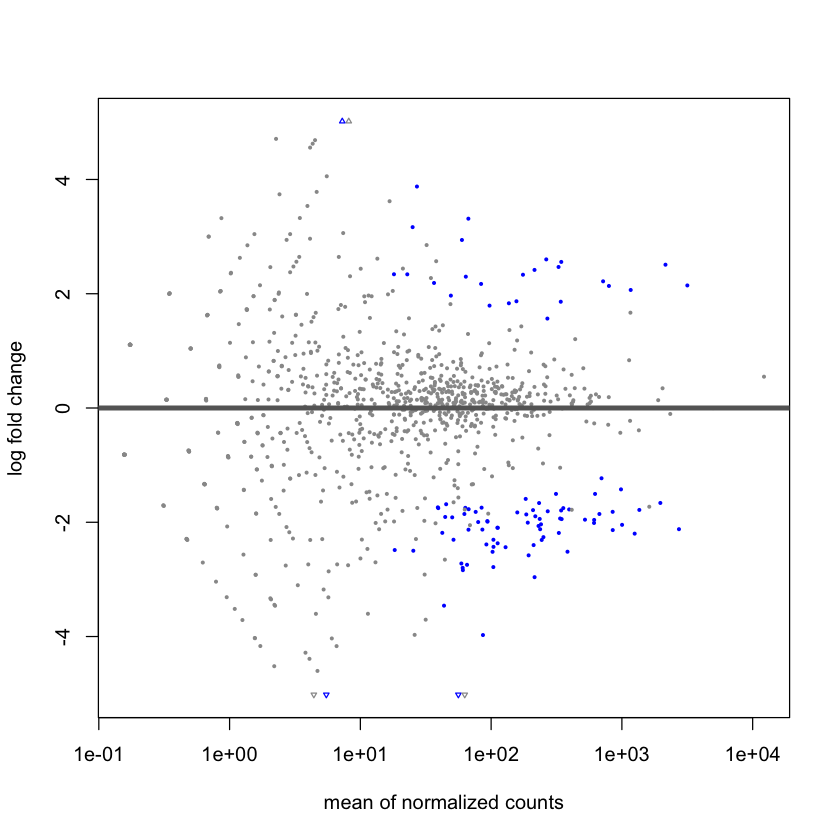

In [13]:
# MAプロット
plotMA(res, alpha = 0.01)
# plot(log(res$baseMean),res$log2FoldChange) #(↑と同じことやってる)

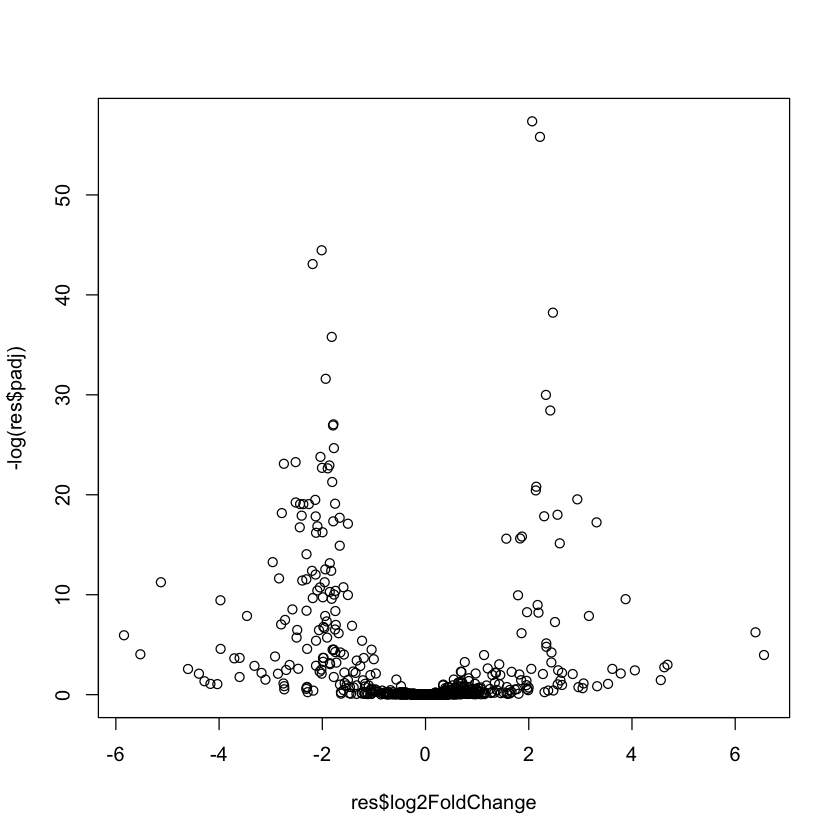

In [16]:
#volcano plot
plot(res$log2FoldChange,-log(res$padj))

In [ ]:
# 対数変換してDESeqTransformオブジェクトを作成（？）
ntd <- normTransform(dds)

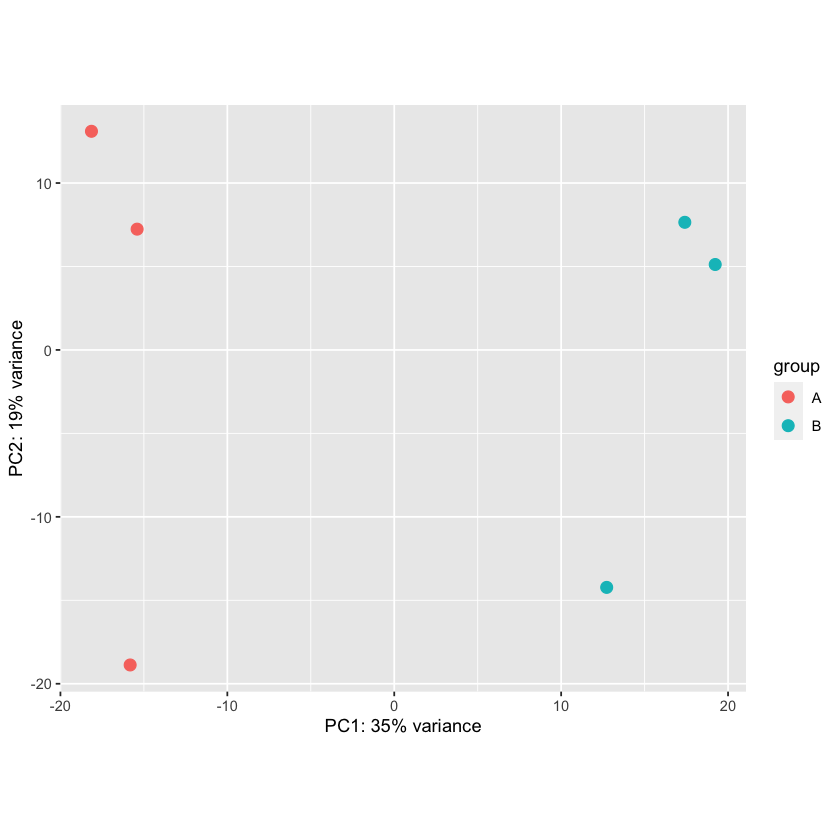

In [26]:
# PCAプロット
# 比較vs対象群でちゃんと分離できてることを確認
plotPCA(ntd, intgroup=c("con")) # intgroupには↑でグループ分類条件(A,B,...)に使った配列名入れる

In [31]:
assay(ntd)

,A1,A2,A3,B1,B2,B3
gene_1,1.9300684,1.536735,5.2628610,2.373984,1.617633,0.000000
gene_2,9.3176374,9.585345,9.1197750,7.439439,6.571774,6.267753
gene_3,5.0786048,5.214360,4.9059970,3.056841,3.365861,3.639212
gene_4,6.6073573,7.302531,6.6981811,5.348559,5.047234,4.915065
gene_5,1.5229706,3.256433,0.9522476,2.048857,1.024572,0.000000
gene_6,8.6204606,8.474135,8.5469676,7.130398,6.540053,5.940743
gene_7,4.3698244,4.883649,3.3713980,1.032754,1.617633,3.051827
gene_8,6.3500435,5.420556,4.9502962,5.150380,4.045735,4.055459
gene_9,10.5096725,12.206666,10.3249983,8.956432,10.382969,8.727824
gene_10,8.4911992,8.431072,8.0831158,6.367760,6.803176,6.501360


         A1       A2       A3       B1       B2
A2 40.93787                                    
A3 42.49000 43.19859                           
B1 48.77403 49.60014 49.40086                  
B2 47.74092 49.49879 48.99185 40.67413         
B3 46.98283 48.40697 46.51138 41.78080 42.58637

,A1,A2,A3,B1,B2,B3
A1,0.00000,40.93787,42.49000,48.77403,47.74092,46.98283
A2,40.93787,0.00000,43.19859,49.60014,49.49879,48.40697
A3,42.49000,43.19859,0.00000,49.40086,48.99185,46.51138
B1,48.77403,49.60014,49.40086,0.00000,40.67413,41.78080
B2,47.74092,49.49879,48.99185,40.67413,0.00000,42.58637
B3,46.98283,48.40697,46.51138,41.78080,42.58637,0.00000


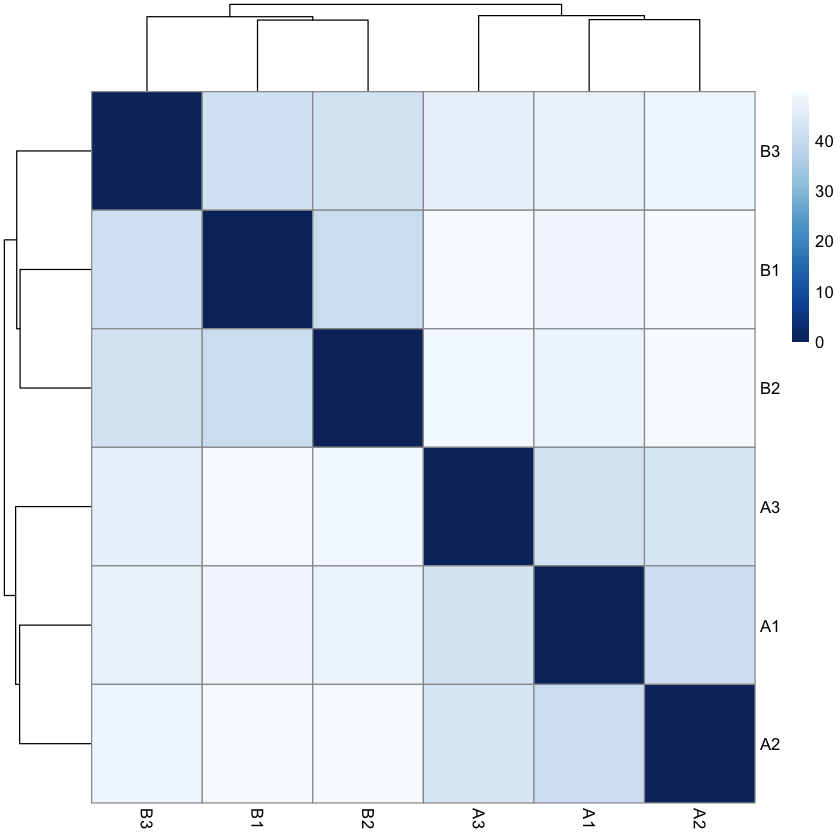

In [57]:
sampleDists <- dist(t(assay(ntd)))
sampleDists # サンプル間の距離的な？

# 距離に応じて階層的クラスタリング
library("RColorBrewer")
library("pheatmap")

sampleDistMatrix <- as.matrix(sampleDists)
rownames(sampleDistMatrix) <- colnames(ntd) # プロット図に表示されるサンプル名
colnames(sampleDistMatrix) <- colnames(ntd)
sampleDistMatrix # この表をプロット

colors <- colorRampPalette( rev(brewer.pal(9, "Blues")) )(255)
pheatmap(sampleDistMatrix,
 clustering_distance_rows=sampleDists,
 clustering_distance_cols=sampleDists,
 col=colors)

In [61]:
assay(dds)

,A1,A2,A3,B1,B2,B3
gene_1,3,2,40,4,2,0
gene_2,680,807,594,165,91,73
gene_3,35,38,31,7,9,11
gene_4,103,165,110,38,31,28
gene_5,2,9,1,3,1,0
gene_6,419,373,399,133,89,58
gene_7,21,30,10,1,2,7
gene_8,86,44,32,33,15,15
gene_9,1555,4971,1371,474,1290,406
gene_10,383,362,289,78,107,86


Warning message in bplt(at[i], wid = width[i], stats = z$stats[, i], out = z$out[z$group == :
“ 外れ値 (-Inf) は描かれません 箱型図 1 中では ”
Warning message in bplt(at[i], wid = width[i], stats = z$stats[, i], out = z$out[z$group == :
“ 外れ値 (-Inf) は描かれません 箱型図 2 中では ”
Warning message in bplt(at[i], wid = width[i], stats = z$stats[, i], out = z$out[z$group == :
“ 外れ値 (-Inf) は描かれません 箱型図 3 中では ”
Warning message in bplt(at[i], wid = width[i], stats = z$stats[, i], out = z$out[z$group == :
“ 外れ値 (-Inf) は描かれません 箱型図 4 中では ”
Warning message in bplt(at[i], wid = width[i], stats = z$stats[, i], out = z$out[z$group == :
“ 外れ値 (-Inf) は描かれません 箱型図 5 中では ”
Warning message in bplt(at[i], wid = width[i], stats = z$stats[, i], out = z$out[z$group == :
“ 外れ値 (-Inf) は描かれません 箱型図 6 中では ”


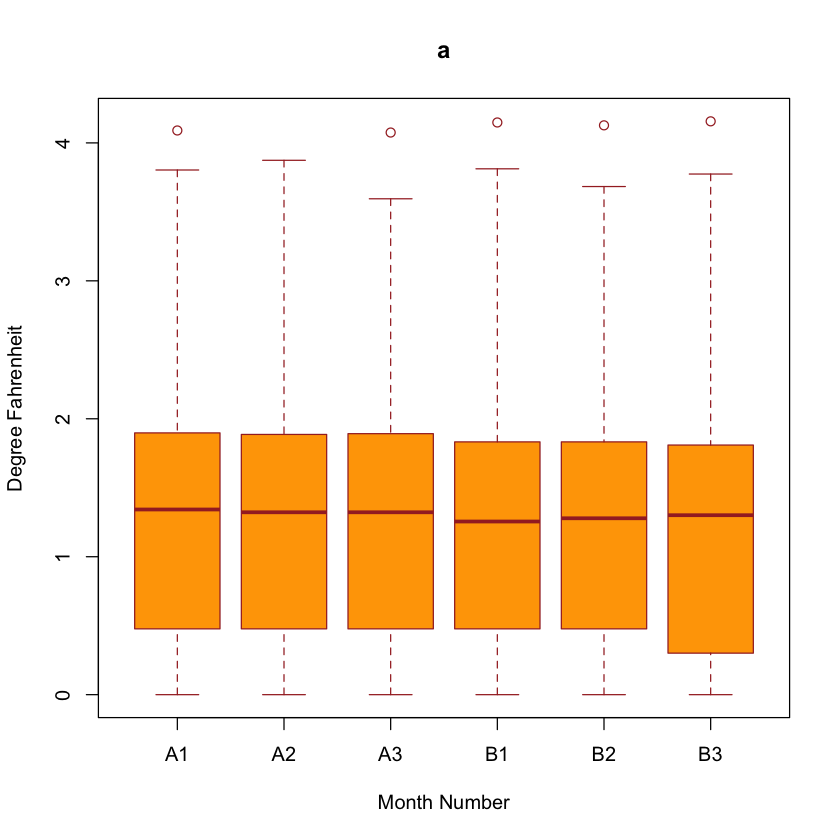

In [75]:
#par(mar=c(8,5,2,2)) #余白調整
boxplot(log10(assay(dds)),
        main="a",
        xlab="Month Number",
        ylab="Degree Fahrenheit",
        col="orange",
        border="brown"
       )